In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [58]:
df = pd.read_csv("/kaggle/input/online-retail-dataset/online_retail.csv")
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [59]:
df.info()
df.isnull().sum()
df_clean = df.dropna()
df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [60]:
df["Description"] = df["Description"].fillna(0)
df["CustomerID"] = df["CustomerID"].fillna(0)

In [61]:
df = df.drop_duplicates()
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])



In [62]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421696,4.632656,11435.904653
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,0.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,0.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,14336.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16241.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,6795.044250


**Completed data cleaning **

In [63]:
df["UnitPrice"].median()


2.08

In [64]:
df["Description"].mode()


0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [65]:
df["Quantity"].var()


48018.02532598476

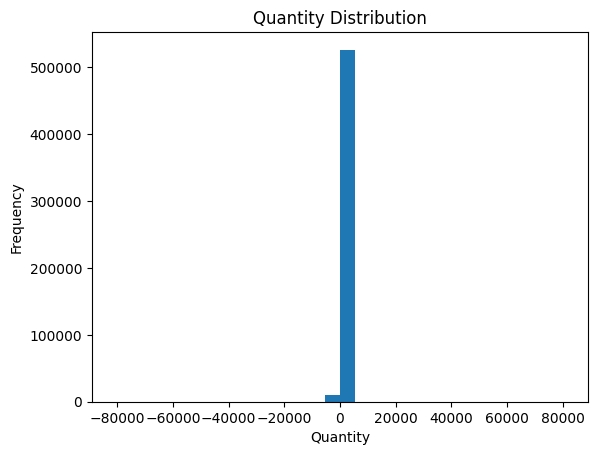

In [66]:
plt.hist(df["Quantity"], bins=30)
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Quantity Distribution")
plt.show()


In [67]:
df[["Quantity", "UnitPrice"]].corr()


,Quantity,UnitPrice
Quantity,1.000000,-0.001241
UnitPrice,-0.001241,1.000000


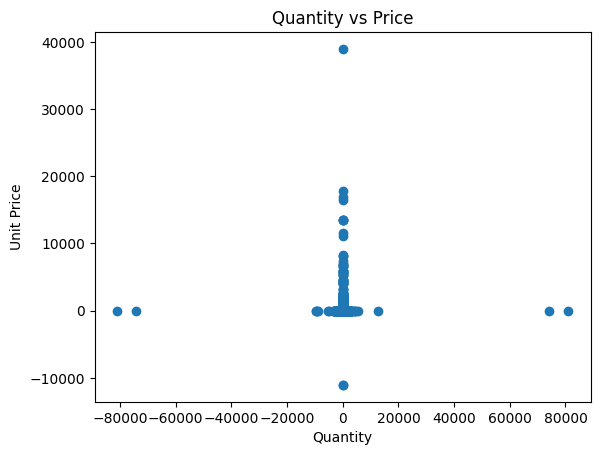

In [68]:
plt.scatter(df["Quantity"], df["UnitPrice"])
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.title("Quantity vs Price")
plt.show()


SQL Analysis (Using Pandas)

SELECT Description, SUM(Quantity) AS total_quantity
FROM sales
GROUP BY Description
ORDER BY total_quantity DESC
LIMIT 10;


In [69]:
top_products = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

SELECT Country, SUM(Quantity * UnitPrice) AS total_revenue
FROM sales
GROUP BY Country
ORDER BY total_revenue DESC;


In [70]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
sales_by_country = (
    df.groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

sales_by_country



Country
United Kingdom          8167128.184
Netherlands              284661.540
EIRE                     262993.380
Germany                  221509.470
France                   197317.110
Australia                137009.770
Switzerland               56363.050
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  29302.970
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Hong Kong                  9908.240
Singapore                  9120.390
Israel                     7901.970
Poland                     7213.140
Unspecified                4740.940
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

SELECT CustomerID, SUM(Revenue) AS total_spent
FROM sales
GROUP BY CustomerID
ORDER BY total_spent DESC
LIMIT 10;


In [71]:
top_customers = (
    df.groupby("CustomerID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers


CustomerID
0.0        1447487.53
14646.0     279489.02
18102.0     256438.49
17450.0     187322.17
14911.0     132458.73
12415.0     123725.45
14156.0     113214.59
17511.0      88125.38
16684.0      65892.08
13694.0      62690.54
Name: Revenue, dtype: float64

CASE
    WHEN total_spent > 10000 THEN 'High'
    WHEN total_spent >= 5000 THEN 'Medium'
    ELSE 'Low'
END


In [72]:
customer_spending = df.groupby("CustomerID")["Revenue"].sum().reset_index()

def categorize(spend):
    if spend > 10000:
        return "High"
    elif spend >= 5000:
        return "Medium"
    else:
        return "Low"

customer_spending["Category"] = customer_spending["Revenue"].apply(categorize)

customer_spending.head()


,CustomerID,Revenue,Category
0,0.0,1447487.53,High
1,12346.0,0.00,Low
2,12347.0,4310.00,Low
3,12348.0,1797.24,Low
4,12349.0,1757.55,Low


RANK() OVER (ORDER BY total_spent DESC)


In [73]:
customer_spending["Rank"] = (
    customer_spending["Revenue"]
    .rank(method="dense", ascending=False)
)

customer_spending.sort_values("Rank").head(10)


,CustomerID,Revenue,Category,Rank
0,0.0,1447487.53,High,1.0
1704,14646.0,279489.02,High,2.0
4234,18102.0,256438.49,High,3.0
3759,17450.0,187322.17,High,4.0
1896,14911.0,132458.73,High,5.0
56,12415.0,123725.45,High,6.0
1346,14156.0,113214.59,High,7.0
3802,17511.0,88125.38,High,8.0
3203,16684.0,65892.08,High,9.0
1006,13694.0,62690.54,High,10.0


SELECT Country, SUM(Revenue)
FROM sales
GROUP BY Country;


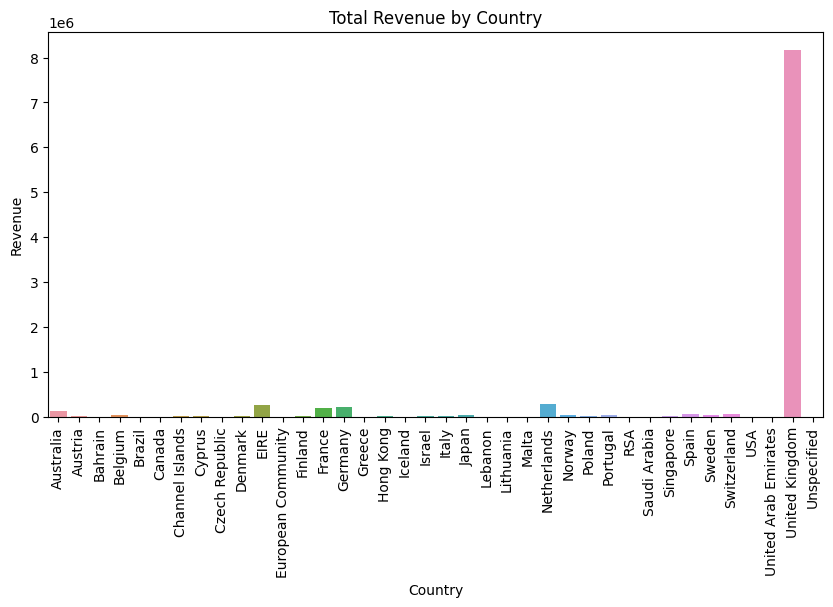

In [74]:
sales_by_country = (
    df.groupby("Country")["Revenue"]
    .sum()
    .reset_index()
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=sales_by_country, x="Country", y="Revenue")
plt.xticks(rotation=90)
plt.title("Total Revenue by Country")
plt.show()



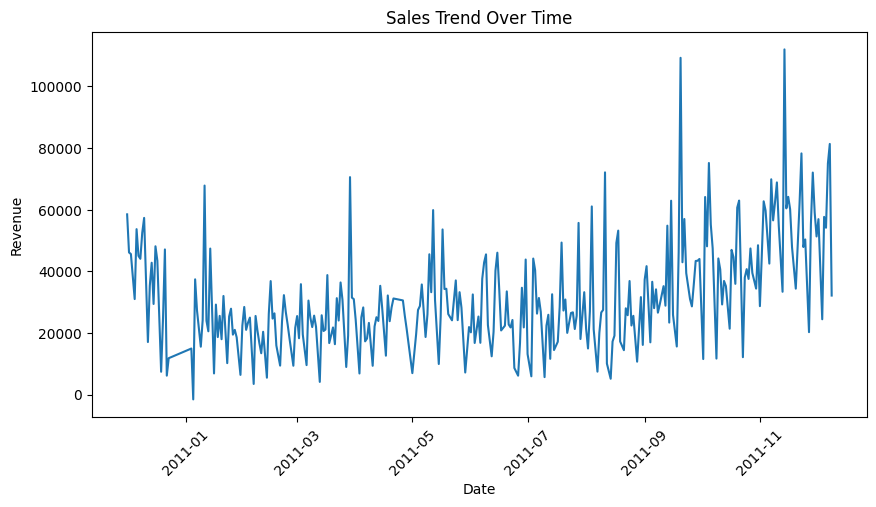

In [75]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Date"] = df["InvoiceDate"].dt.date
sales_over_time = (
    df.groupby("Date")["Revenue"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(sales_over_time["Date"], sales_over_time["Revenue"])
plt.xticks(rotation=45)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()



-- SQL does not directly draw heatmaps
-- Correlation is usually calculated in analytics tools


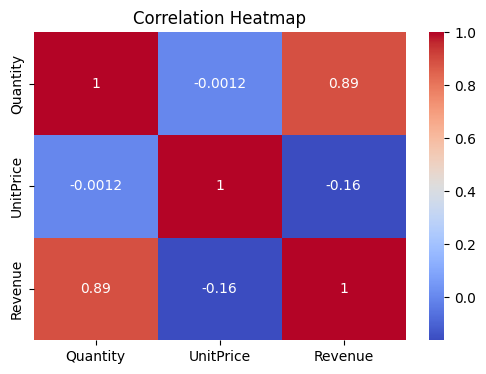

In [76]:
corr_data = df[["Quantity", "UnitPrice", "Revenue"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_data, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


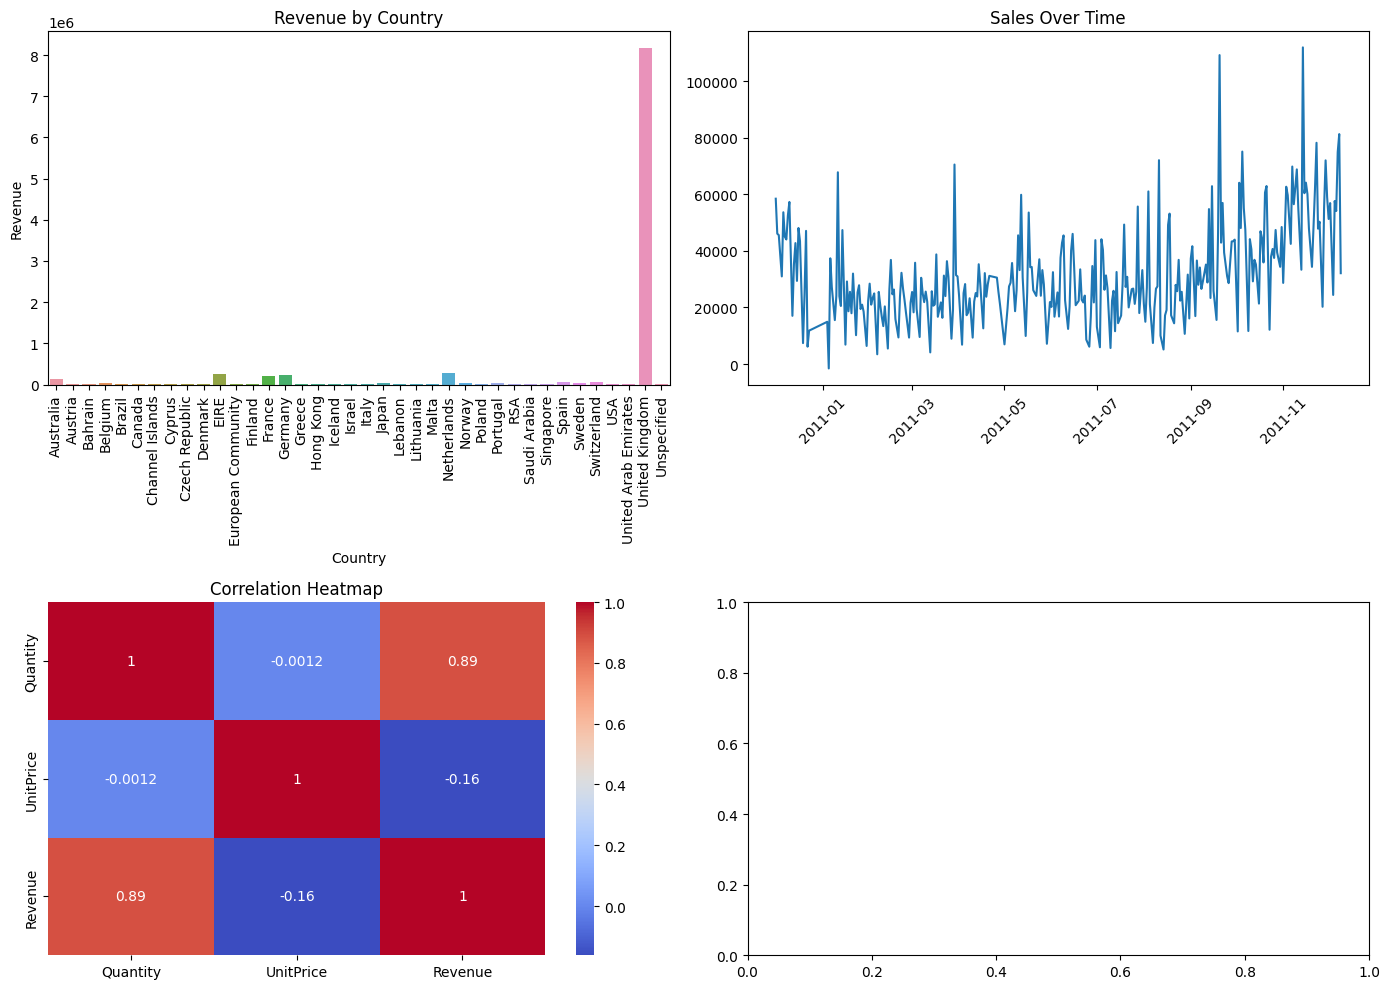

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Bar plot
sns.barplot(data=sales_by_country, x="Country", y="Revenue", ax=axes[0,0])
axes[0,0].set_title("Revenue by Country")
axes[0,0].tick_params(axis='x', rotation=90)

# Line plot
axes[0,1].plot(sales_over_time["Date"], sales_over_time["Revenue"])
axes[0,1].set_title("Sales Over Time")
axes[0,1].tick_params(axis='x', rotation=45)

# Heatmap
sns.heatmap(corr_data, annot=True, ax=axes[1,0], cmap="coolwarm")
axes[1,0].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()


Total Revenue: Overall business income
Total Orders: Number of unique invoices
Average Order Value: Revenue per order


In [78]:
total_revenue = df["Revenue"].sum()
total_orders = df["InvoiceNo"].nunique()
avg_order_value = total_revenue / total_orders

total_revenue, total_orders, avg_order_value


(9726006.954, 25900, 375.521504015444)

In [79]:
plt.savefig("sales_dashboard.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>